# Secant Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import secant_plot

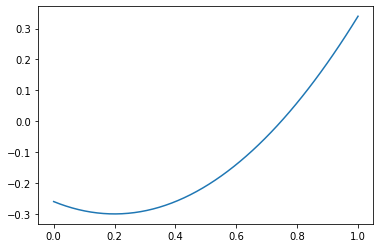

In [2]:
def f(x):
    return (x - 0.2)**2 - 0.3

x = np.linspace(0,1)
plt.plot(x, f(x))
plt.show()

In the secant method we construct a line running between two points on the curve $(x_0, f(x_0))$ and $(x_1, f(x_1))$, and find where it intersects with the $x$-axis: $x_2$:


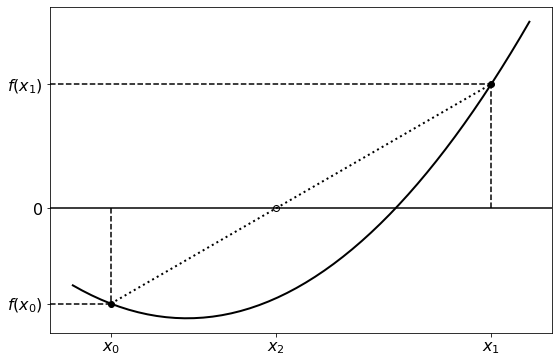

In [3]:
fig, ax = secant_plot(f, 0, 1, 0, [-0.1, 1.1])

plt.show()

It is assumed that the new point is closer to the root. The justification behind this is beyond the scope of this course.

Note that the starting values $x_0$ and $x_1$ can bracket the root, though they need not. You should choose points that are close to the root you desire to find, especially if the function has multiple roots. 

We can continue in this fashion, constructing a line between $(x_1, f(x_1))$ and $(x_2, f(x_2))$, and finding the point where this line intersects with the $x$-axis, $x_3$. We can continue using the last two points to find the new one, all the while getting closer to the root with each point, as illustrated with the following figures:

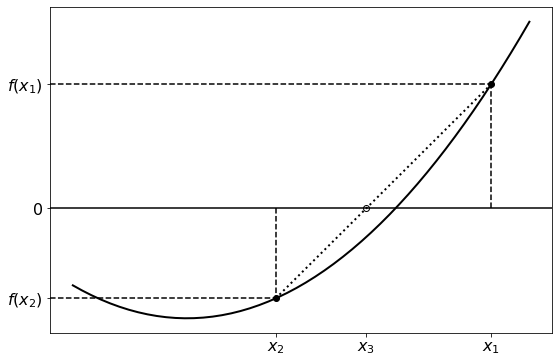

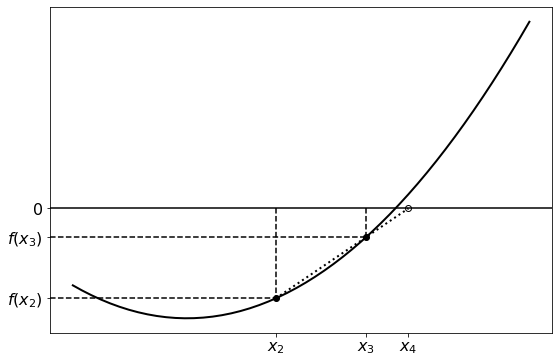

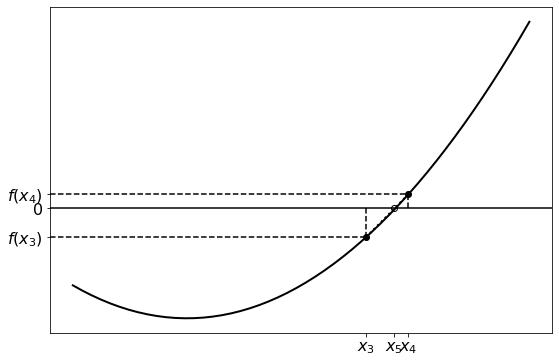

In [4]:
N = 3

x1, x2 = 0, 1

figs, axs = N*[None], N*[None]

for i in range(N):
    x1, x2 = x2, x2 - f(x2)*(x2 - x1)/(f(x2) - f(x1))
    
    figs[i], axs[i] = secant_plot(f, x1, x2, i+1, [-0.1, 1.1])

plt.show()

To calculate the intersection $x_n$ for the line constructed from the previous two points $(x_{n-2}, f(x_{n-2}))$ and $(x_{n-2}, f(x_{n-2}))$ we find the equation of the line:

$$
y = \frac{f(x_{n-1}) - f(x_{n-2})}{x_{n-1} - x_{n-2}}(x - x_{n-1}) + f(x_{n-1})
$$

At the $x$-intercept $y=0$ and $x = x_n$:

\begin{align*}
0 &= \frac{f(x_{n-1}) - f(x_{n-2})}{x_{n-1} - x_{n-2}}(x_n - x_{n-1}) + f(x_{n-1})\\
\therefore x_n &= x_{n-1} - f(x_{n-1}) \frac{x_{n-1} - x_{n-2}}{f(x_{n-1}) - f(x_{n-2})}
\end{align*}

## Precision

In general the secant method converges far faster than the bisection method, however it is not possible to predict how many iterations are required to achieve a given precision. The precision of the solution can be determined by measuring the convergence of you solution. For a given tolerance, you have reached your required precision when:

$$
|x_n - x_{n-1}| < \text{tolerance}
$$

Practically you can use a `while` loop to achieve this.

## Instability

Unlike the bisection method, the secant method isn't always guaranteed to converge, depending on the characteristics of $f(x)$. For example, if there is a stationary point, or if the gradient of $f(x)$ approaches 0 the constructed line can become nearly horizontal, causing the next value of $x_n$ to diverge.

It is also possible for the solution to converge to a different root if they are in close proximity.